In [1]:
# https://docs.pyvista.org

import matplotlib.pyplot as plt
import pyvista as pv

/home/alex/anaconda3/envs/ml03/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'
Failed to establish dbus connection

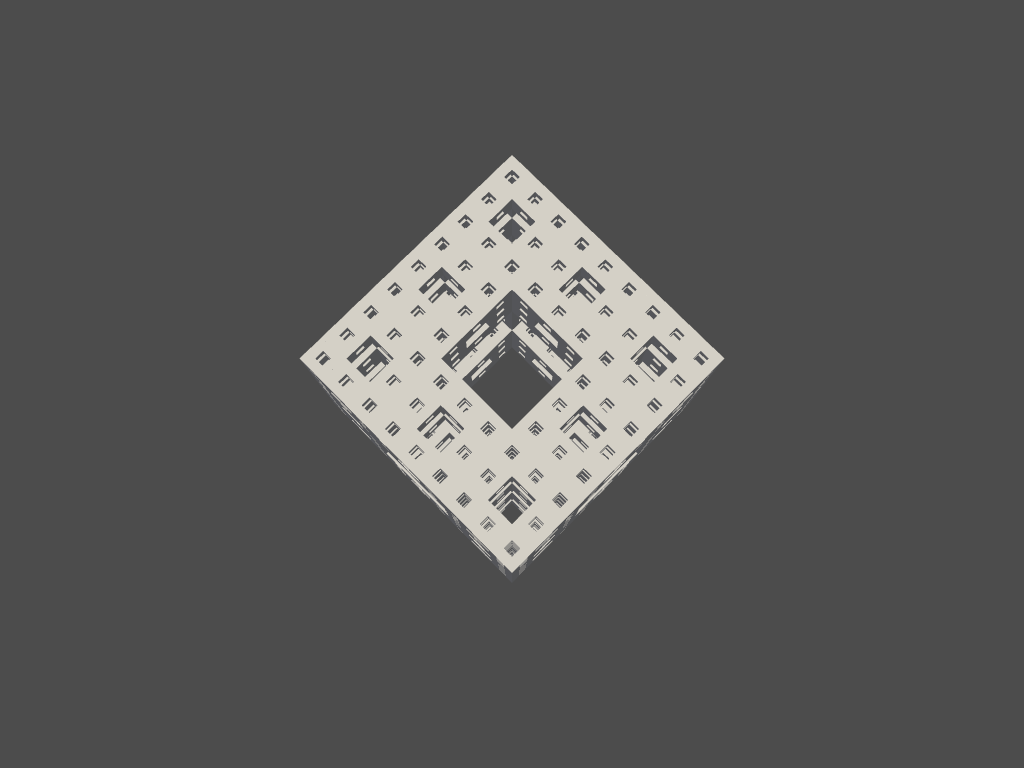

In [2]:
# read
filename = 'in.stl'
reader = pv.get_reader(filename)
mesh = reader.read()

# rotate
axes = pv.Axes(show_actor=True, actor_scale=2.0, line_width=5)
axes.origin = (3.0, 3.0, 3.0)
mesh.rotate_z(45, point=axes.origin, inplace=True)
mesh.rotate_y(180, point=axes.origin, inplace=True)
mesh.rotate_x(-45, point=axes.origin, inplace=True)
mesh.rotate_z(-45, point=axes.origin, inplace=True)

# Establish geometry within a pv.Plotter()
#p = pv.Plotter(off_screen=True)
p = pv.Plotter()
p.add_mesh(mesh, color=True)
p.store_image = True  # permit image caching after plotter is closed
p.show()

In [3]:
# get depth
zval = p.get_image_depth()
zval_filled_by_42s = p.get_image_depth(fill_value=42.0)

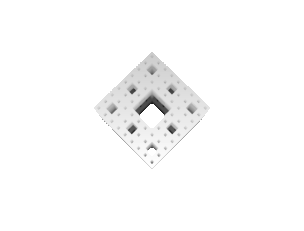

In [4]:
plt.figure()
plt.imshow(zval, cmap='gray')
plt.axis('off')
plt.savefig('out.png',dpi=300)